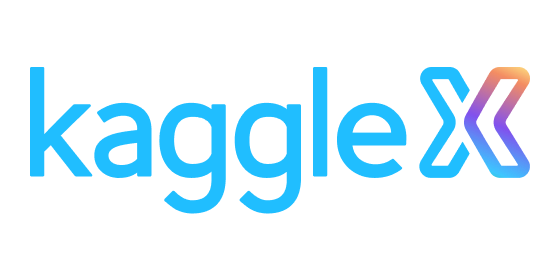!

### <font color = 'cyan'> Name: Olanrewaju Adegoke
### <font color = 'cyan'> Kaggle username: Olalytics
### <font color = 'cyan'> Email: larrysman2004@yahoo.com

#### KaggleX Skill Assessment Challenge

As a component of the KaggleX application, participate in this challenge by predicting the price of a used vehicle.

##### Data Description

The dataset for this competition (both train and test) was generated from a deep learning model fine-tuned on the Used Car Price Prediction Dataset dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance, but that is not required.

##### Files:

- train.csv - the training dataset; refer to the original dataset link above for column descriptions.

- test.csv - the test dataset; your objective is to predict the value of the target Price.

- sample_submission.csv - a sample submission file in the correct format.ormat

[data reference:](https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset)

In [2]:
import os
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\KaggleX Cohort4 Challenge\\notebooks'

##### Import the necessary libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re

###### Define the folder's path

In [4]:
main = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\KaggleX Cohort4 Challenge'
data = '../data'
model = '../models'
notebook = '../notebooks'
resource = '../resources'
visual = '../visuals'
output = '../outputs'

##### <font color = 'green'> Import self-customized machine learning module

In [6]:
%%time
os.chdir(resource)
import olanrewaju as ola

CPU times: total: 156 ms
Wall time: 2.07 s


In [9]:
dir(ola)

['LabelEncoder',
 'LogisticRegression',
 'MinMaxScaler',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'RFE',
 'RandomForestClassifier',
 'StandardScaler',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'all_num_transform',
 'categorical_data',
 'change_dtype_function',
 'check_wrong_label',
 'concat_df',
 'convert_rfe_features_to_dataframe',
 'dataframe_describe',
 'dataframe_explore',
 'date_to_datetime_format',
 'datetime',
 'dropping_columns',
 'duplicate_corrector',
 'feature_selection_rfe',
 'feature_target_selector',
 'file_copy_v2',
 'file_image_saver_versioning_v1',
 'file_load_v4',
 'get_dummy_encoder',
 'joblib',
 'label_encoding',
 'merging_rfe_df',
 'min_max_scaler',
 'mislabel_function_corrector_v2',
 'missing_and_duplicate_checker',
 'missing_value_corrector_v2',
 'norm_scaler',
 'np',
 'numerical_data',
 'one_hot_encoding',
 'ordinal_encoding',
 'os',
 'outliers_correction_iqr',
 'pd',
 'plotting

In [7]:
os.chdir(notebook)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\KaggleX Cohort4 Challenge\\notebooks'

###### Load the datasets

In [8]:
os.chdir(data)
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\KaggleX Cohort4 Challenge\\data'

In [10]:
help(ola.file_load_v4)

Help on function file_load_v4 in module olanrewaju:

file_load_v4(main_path, file_path, file_name, file_format)
    This is a file loader function that implements file I/O for the following file formats:
        1. .csv
        2. xlsx or xls
    Inputs:
        order: (main_path, file_path, file_name, file_format)
        main_path: This is the string directory to file location. It is the parent folder that contain the folder that housed the dataset.
        file_path: This is the path to the directory that housed the data written out in string.
        file_name: This is the name of the data or file without the file extension and must be in string also.
        file_format: This is the format of the file you are trying to upload. It can be a csv, xlsx or xls.
                     Please do not add the '.' at the prefix or suffix of any of the file format.

    Outputs:
        The function returns a pandas DataFrame.
        Remember to create a container for the outputs.



In [11]:
%%time
main_path = main
file_path = 'data'
file_name = 'train'
file_format = 'csv'
train = ola.file_load_v4(main_path, file_path, file_name, file_format)
train.head()

CPU times: total: 78.1 ms
Wall time: 188 ms


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [12]:
%%time
main_path = main
file_path = 'data'
file_name = 'test'
file_format = 'csv'
test = ola.file_load_v4(main_path, file_path, file_name, file_format)
test.head()

CPU times: total: 78.1 ms
Wall time: 108 ms


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [13]:
%%time
main_path = main
file_path = 'data'
file_name = 'sample_submission'
file_format = 'csv'
submission = ola.file_load_v4(main_path, file_path, file_name, file_format)
submission.head()

CPU times: total: 0 ns
Wall time: 24.9 ms


,id,price
0,54273,39218.443
1,54274,39218.443
2,54275,39218.443
3,54276,39218.443
4,54277,39218.443


In [14]:
train.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [15]:
test.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [17]:
train.engine.unique()

array(['375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel',
       '300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel', ..., '3.0L',
       '3.0 Liter GTDI',
       '120.0HP 2.2L 4 Cylinder Engine Flex Fuel Capability'],
      dtype=object)

#### <font color = 'purple'> Preprocessing of the Train and Test Data

We would be concatenate the train and test dataset and preprocess them at once. But we need to create an arbitrary column(`price`) for test dataset so that it matches with the train.

In [31]:
test['price'] = -1
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes,-1
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes,-1
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes,-1
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes,-1
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,-1


###### Concatenate both train and test dataset

In [76]:
df = pd.concat([train, test], axis=0, ignore_index=False)
df.shape

(90456, 13)

###### Assigned `train` and `test` to the dataset for tracebility

In [77]:
df['data_source'] = np.where(df['price'] == -1, 'test', 'train')
print(train.shape, test.shape, df.shape)
df.head()

(54273, 13) (36183, 13) (90456, 14)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,data_source
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,train
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,train
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,train
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,train
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,train


In [78]:
missing_data = df.isnull()

for miss in missing_data.columns.values.tolist():
    print(miss, missing_data[miss].value_counts())

id id
False    90456
Name: count, dtype: int64
brand brand
False    90456
Name: count, dtype: int64
model model
False    90456
Name: count, dtype: int64
model_year model_year
False    90456
Name: count, dtype: int64
milage milage
False    90456
Name: count, dtype: int64
fuel_type fuel_type
False    90456
Name: count, dtype: int64
engine engine
False    90456
Name: count, dtype: int64
transmission transmission
False    90456
Name: count, dtype: int64
ext_col ext_col
False    90456
Name: count, dtype: int64
int_col int_col
False    90456
Name: count, dtype: int64
accident accident
False    90456
Name: count, dtype: int64
clean_title clean_title
False    90456
Name: count, dtype: int64
price price
False    90456
Name: count, dtype: int64
data_source data_source
False    90456
Name: count, dtype: int64


##### We would extract some key features from the `engine` column

In [87]:
eng = df[['engine']]
eng.head()

,engine
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel


##### Features Engineering to extract `horsepower`, `litre`, `num_of_cylinder` from the engine column

In [88]:
def row_features_extraction(row):  
    features = {}
    # Extract Horsepower (assuming HP follows a numeric value)
    horsepower_match = re.search(r"(\d+\.\d*)HP", row)
    if horsepower_match:
        features["horsepower"] = float(horsepower_match.group(1))
        
    # Extract Litre (assuming L follows a numeric value)
    litre_match = re.search(r"(\d+\.\d*)L", row)
    if litre_match:
        features["litre"] = float(litre_match.group(1))
        
    # Extract number of cylinders (capture text between 'L' and 'Cylinder')
    cylinder_match = re.search(r"L (.*?)Cylinder", row)  # Capture text between 'L' and 'Cylinder' (non-greedy)
    if cylinder_match:
        features["number_of_cylinders"] = cylinder_match.group(1).strip()  # Extract and remove leading/trailing whitespaces
        
    return features    

In [89]:
new_data = eng['engine'].apply(row_features_extraction)
new_data

0        {'horsepower': 375.0, 'litre': 3.5, 'number_of...
1        {'horsepower': 300.0, 'litre': 3.0, 'number_of...
2        {'horsepower': 300.0, 'litre': 4.2, 'number_of...
3        {'horsepower': 335.0, 'litre': 3.0, 'number_of...
4        {'horsepower': 200.0, 'litre': 3.8, 'number_of...
                               ...                        
36178    {'horsepower': 420.0, 'litre': 6.2, 'number_of...
36179    {'horsepower': 295.0, 'litre': 5.3, 'number_of...
36180    {'horsepower': 132.0, 'litre': 1.8, 'number_of...
36181    {'horsepower': 450.0, 'litre': 3.5, 'number_of...
36182    {'horsepower': 320.0, 'litre': 5.3, 'number_of...
Name: engine, Length: 90456, dtype: object

In [90]:
new_df = pd.DataFrame(new_data.tolist())
new_df.head()

,horsepower,litre,number_of_cylinders
0,375.0,3.5,V6
1,300.0,3.0,Straight 6
2,300.0,4.2,8
3,335.0,3.0,Straight 6
4,200.0,3.8,V6


###### Replace the columns with the prefered names you wanted

In [91]:
new_df.columns = ['power', 'litre', 'num_cylinder']
new_df.head()

,power,litre,num_cylinder
0,375.0,3.5,V6
1,300.0,3.0,Straight 6
2,300.0,4.2,8
3,335.0,3.0,Straight 6
4,200.0,3.8,V6


##### We can still engineered the features to extract the number of cylinders - Not Necessary for now

In [95]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90456 entries, 0 to 90455
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   power         83793 non-null  float64
 1   litre         89445 non-null  float64
 2   num_cylinder  83569 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.1+ MB


In [99]:
cylinder = new_df[['num_cylinder']]
cylinder.head()

,num_cylinder
0,V6
1,Straight 6
2,8
3,Straight 6
4,V6


In [101]:
cylinder.num_cylinder.unique()

array(['V6', 'Straight 6', '8', '4', nan, 'Flat 6', '5', '12', '10', '3'],
      dtype=object)

In [103]:
cylinder.num_cylinder.value_counts()

num_cylinder
8             27323
V6            26545
4             17395
Straight 6     8488
Flat 6         2456
12              565
5               357
10              335
3               105
Name: count, dtype: int64

##### Complete the Preprocessing of the features for new_df

In [102]:
new_df.isnull().sum()

power           6663
litre           1011
num_cylinder    6887
dtype: int64

###### We need to correct the missing values for each `power, litre and num_cylinder` using replacement by mean and frequency

###### Missing value for `power`

In [104]:
avg_power = new_df['power'].astype('float').mean(axis=0)
print(f'The average horsepower is {avg_power}')

The average horsepower is 331.78544747174584


In [105]:
new_df['power'].replace(np.nan, avg_power, inplace=True)

C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_24732\4283436359.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['power'].replace(np.nan, avg_power, inplace=True)


In [106]:
new_df['power'].isnull().sum()

0

###### Missing value for `litre`

In [107]:
avg_litre = new_df['litre'].astype('float').mean(axis=0)
print(f'The average litre is {avg_litre}')

new_df['litre'].replace(np.nan, avg_litre, inplace=True)

The average litre is 3.7208250880429317


C:\Users\Olanrewaju Adegoke\AppData\Local\Temp\ipykernel_24732\329803975.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['litre'].replace(np.nan, avg_litre, inplace=True)


In [108]:
new_df['litre'].isnull().sum()

0

###### Missing value for `num_cylinder` - we use the replacement by frequency

In [111]:
new_df['num_cylinder'].value_counts()

num_cylinder
8             27323
V6            26545
4             17395
Straight 6     8488
Flat 6         2456
12              565
5               357
10              335
3               105
Name: count, dtype: int64

In [112]:
new_df['num_cylinder'].value_counts().idxmax()

'8'

We would replace the missing values in the `num_cylinder` by `'8'`

In [114]:
new_df['num_cylinder'].replace(np.nan, '8', inplace=True)

In [115]:
new_df['num_cylinder'].isnull().sum()

0

In [116]:
new_df.head()

,power,litre,num_cylinder
0,375.0,3.5,V6
1,300.0,3.0,Straight 6
2,300.0,4.2,8
3,335.0,3.0,Straight 6
4,200.0,3.8,V6


###### Reset the index

In [121]:
new_df = new_df.reset_index(drop=True)
new_df.shape

(90456, 3)

In [122]:
df = df.reset_index(drop=True)
df.shape

(90456, 14)

#### Concatenate the engineered features dataframe `new_df` with the original dataframe `df`

In [123]:
cleaned_df = pd.concat([df, new_df], axis=1)
cleaned_df.shape

(90456, 17)

In [124]:
cleaned_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,data_source,power,litre,num_cylinder
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000,train,375.0,3.5,V6
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250,train,300.0,3.0,Straight 6
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000,train,300.0,4.2,8
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500,train,335.0,3.0,Straight 6
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850,train,200.0,3.8,V6


###### Examining the categorical columns

In [158]:
list(cleaned_df.columns)

['id',
 'brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price',
 'data_source',
 'power',
 'litre',
 'num_cylinder']

In [127]:
cleaned_df.brand.nunique()

55

In [130]:
cleaned_df.model.nunique()

1859

In [132]:
cleaned_df.fuel_type.nunique()

7

In [133]:
cleaned_df.transmission.nunique()

48

In [136]:
cleaned_df.ext_col.nunique()

275

In [137]:
cleaned_df.int_col.nunique()

133

In [138]:
cleaned_df.accident.nunique()

2

In [141]:
cleaned_df.clean_title.nunique()

1

In [142]:
cleaned_df.num_cylinder.nunique()

9

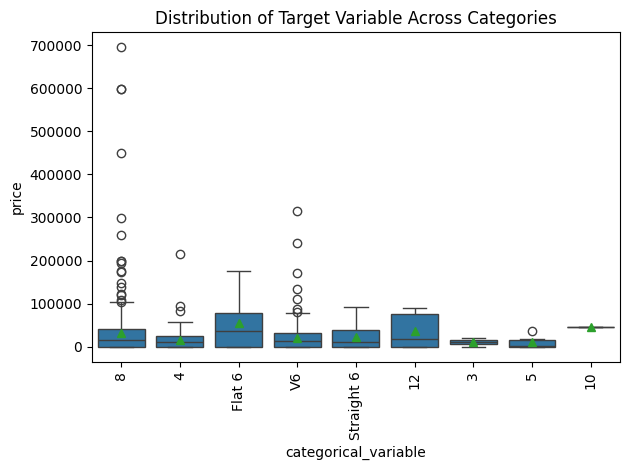

In [157]:
sb.boxplot(
    x = 'num_cylinder',
    y = 'price',
    showmeans = True,
    data = cleaned_df.sample(1000)
)

plt.title('Distribution of Target Variable Across Categories')  
plt.xlabel('categorical_variable')                             
plt.ylabel('price')                      
plt.xticks(rotation=90)                                         
plt.tight_layout()                                              

plt.show()

In [159]:
full_df = cleaned_df.copy()

##### We would need to drop columns that maynot have significant effect on the data

In [160]:
unwanted_cols = ['engine', 'clean_title']

In [161]:
help(ola.dropping_columns)

Help on function dropping_columns in module olanrewaju:

dropping_columns(file, columns)
    This function is used to drop unwanted columns in a dataset and returns a dataframe which is not having the unwanted columns.
    This uses the inplace=True method and returns the same dataset but without the unwanted column/columns.
    Inputs:
        file: This is the dataset.
        columns: This is the list of the unwanted columns in strings.
    Output:
        This function returns a dataframe without the unwanted column/columns.



In [163]:
file = full_df
columns = unwanted_cols
full_df = ola.dropping_columns(file, columns)
full_df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,data_source,power,litre,num_cylinder
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,10-Speed A/T,Blue,Gray,None reported,11000,train,375.0,3.5,V6
1,1,BMW,335 i,2007,80000,Gasoline,6-Speed M/T,Black,Black,None reported,8250,train,300.0,3.0,Straight 6
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,6-Speed A/T,Purple,Beige,None reported,15000,train,300.0,4.2,8
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500,train,335.0,3.0,Straight 6
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,A/T,White,Black,None reported,7850,train,200.0,3.8,V6


In [164]:
full_df.describe()

,id,model_year,milage,price,power,litre
count,90456.000000,90456.000000,90456.000000,9.045600e+04,90456.000000,90456.000000
mean,45227.500000,2015.080769,72639.410332,2.353041e+04,331.785447,3.720825
std,26112.542312,5.589065,50567.715194,5.959289e+04,104.447251,1.329107
min,0.000000,1974.000000,100.000000,-1.000000e+00,70.000000,0.650000
25%,22613.750000,2012.000000,32000.000000,-1.000000e+00,261.000000,3.000000
50%,45227.500000,2016.000000,66000.000000,1.200000e+04,328.000000,3.500000
75%,67841.250000,2019.000000,102000.000000,3.250000e+04,395.000000,4.600000
max,90455.000000,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000


In [165]:
full_df.duplicated().sum()

0

##### Select Numerical, categorical, target and the added columns - data_source

In [166]:
num_cols = ['model_year', 'milage', 'power', 'litre']

num_data = full_df[num_cols]
num_data.head()

,model_year,milage,power,litre
0,2018,74349,375.0,3.5
1,2007,80000,300.0,3.0
2,2009,91491,300.0,4.2
3,2022,2437,335.0,3.0
4,2001,111000,200.0,3.8


In [180]:
cat_cols = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'num_cylinder']

cat_data = full_df[cat_cols]
cat_data.head()

,brand,model,fuel_type,transmission,ext_col,int_col,accident,num_cylinder
0,Ford,F-150 Lariat,Gasoline,10-Speed A/T,Blue,Gray,None reported,V6
1,BMW,335 i,Gasoline,6-Speed M/T,Black,Black,None reported,Straight 6
2,Jaguar,XF Luxury,Gasoline,6-Speed A/T,Purple,Beige,None reported,8
3,BMW,X7 xDrive40i,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Straight 6
4,Pontiac,Firebird Base,Gasoline,A/T,White,Black,None reported,V6


In [181]:
targ_col = ['price']

target_data = full_df[targ_col]
target_data.head()

,price
0,11000
1,8250
2,15000
3,63500
4,7850


In [233]:
other_cols = ['id', 'data_source']

others = full_df[other_cols]
others.head()

,id,data_source
0,0,train
1,1,train
2,2,train
3,3,train
4,4,train


###### Numerical Transformation

In [172]:
from sklearn.preprocessing import StandardScaler

In [174]:
# Call the function
file = num_data
num_df = ola.standard_scaler(file)
num_df.head()

,model_year,milage,power,litre
0,0.522314,0.033808,0.413748,-0.166146
1,-1.445825,0.145560,-0.304322,-0.542341
2,-1.087982,0.372801,-0.304322,0.360526
3,1.238001,-1.388293,0.030777,-0.542341
4,-2.519356,0.758603,-1.261749,0.059570


In [177]:
round(num_df.mean()), round(num_df.std())

(model_year   -0.0
 milage       -0.0
 power         0.0
 litre        -0.0
 dtype: float64,
 model_year    1.0
 milage        1.0
 power         1.0
 litre         1.0
 dtype: float64)

##### Categorical Encoding
###### Encoding the categorical data using different strategy based on the characteristics of each labels in a column

In [184]:
count = cat_data.columns.values.tolist()
for cnt in count:
    print(cnt, cat_data[cnt].nunique())
    print('')

brand 55

model 1859

fuel_type 7

transmission 48

ext_col 275

int_col 133

accident 2

num_cylinder 9



###### OneHotEncoding for `fuel_type`, `accident`, `num_cylinder`

In [185]:
one_hot_col = ['fuel_type', 'accident', 'num_cylinder']

one_hot_data = cat_data[one_hot_col]
one_hot_data.head()

,fuel_type,accident,num_cylinder
0,Gasoline,None reported,V6
1,Gasoline,None reported,Straight 6
2,Gasoline,None reported,8
3,Hybrid,None reported,Straight 6
4,Gasoline,None reported,V6


###### Call the function

In [231]:
file = one_hot_data
one_hot_df = ola.one_hot_encoding(file)

one_hot_df = one_hot_df.reset_index(drop=True)

one_hot_df.head()

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_At least 1 accident or damage reported,accident_None reported,num_cylinder_10,num_cylinder_12,num_cylinder_3,num_cylinder_4,num_cylinder_5,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


##### LabelEncoding for `brand`, `model`, `transmission`, `ext_col`, `int_col`

In [189]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, TargetEncoder

###### Encoding the `brand` column

In [215]:
other_cols = ['brand']
other_data = cat_data[other_cols]
other_data.head()

,brand
0,Ford
1,BMW
2,Jaguar
3,BMW
4,Pontiac


In [216]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [217]:
encoder_feat = encoder.fit_transform(other_data)
encoder_feat

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([14,  4, 21, ..., 51, 27,  9])

In [219]:
encod_brand = pd.DataFrame(encoder_feat, columns=list(other_data.columns))
encod_brand = encod_brand.reset_index(drop=True)
encod_brand.head()

,brand
0,14
1,4
2,21
3,4
4,40


###### Encoding the `model` column

In [220]:
other_cols = ['model']
other_data = cat_data[other_cols]
other_data.head()

,model
0,F-150 Lariat
1,335 i
2,XF Luxury
3,X7 xDrive40i
4,Firebird Base


In [221]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [222]:
encoder_feat = encoder.fit_transform(other_data)
encoder_feat

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 649,   49, 1803, ...,  493, 1122, 1639])

In [223]:
encod_model = pd.DataFrame(encoder_feat, columns=list(other_data.columns))
encod_model = encod_model.reset_index(drop=True)
encod_model.head()

,model
0,649
1,49
2,1803
3,1779
4,699


###### Encoding the `transmission` column

In [224]:
other_cols = ['transmission']
other_data = cat_data[other_cols]
other_data.head()

,transmission
0,10-Speed A/T
1,6-Speed M/T
2,6-Speed A/T
3,Transmission w/Dual Shift Mode
4,A/T


In [225]:
encoder = LabelEncoder()
encoder

LabelEncoder()

In [226]:
encoder_feat = encoder.fit_transform(other_data)
encoder_feat

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 2, 19, 15, ..., 11,  2, 35])

In [227]:
encod_trans = pd.DataFrame(encoder_feat, columns=list(other_data.columns))
encod_trans = encod_trans.reset_index(drop=True)
encod_trans.head()

,transmission
0,2
1,19
2,15
3,45
4,35


###### Encoding the `ext_col` column

In [229]:
other_cols = ['ext_col']
other_data = cat_data[other_cols]

encoder = LabelEncoder()

encoder_feat = encoder.fit_transform(other_data)

encod_ext = pd.DataFrame(encoder_feat, columns=list(other_data.columns))
encod_ext = encod_ext.reset_index(drop=True)
encod_ext.head()

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ext_col
0,28
1,19
2,194
3,107
4,263


###### Encoding the `int_col` column

In [230]:
other_cols = ['int_col']
other_data = cat_data[other_cols]

encoder = LabelEncoder()

encoder_feat = encoder.fit_transform(other_data)

encod_int = pd.DataFrame(encoder_feat, columns=list(other_data.columns))
encod_int = encod_int.reset_index(drop=True)
encod_int.head()

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,int_col
0,63
1,12
2,9
3,28
4,12


###### Concatenate all encoded categorical data altogether

In [232]:
cat_df = pd.concat([one_hot_df, encod_brand, encod_model, encod_trans, encod_ext, encod_int], axis=1)
cat_df.head()

,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_At least 1 accident or damage reported,accident_None reported,num_cylinder_10,...,num_cylinder_5,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,14,649,2,28,63
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4,49,19,19,12
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,21,1803,15,194,9
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4,1779,45,107,28
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,40,699,35,263,12


In [234]:
num_df.head()

,model_year,milage,power,litre
0,0.522314,0.033808,0.413748,-0.166146
1,-1.445825,0.145560,-0.304322,-0.542341
2,-1.087982,0.372801,-0.304322,0.360526
3,1.238001,-1.388293,0.030777,-0.542341
4,-2.519356,0.758603,-1.261749,0.059570


In [235]:
target_data = target_data.reset_index(drop=True)
target_data.head()

,price
0,11000
1,8250
2,15000
3,63500
4,7850


In [236]:
others = others.reset_index(drop=True)
others.head()

,id,data_source
0,0,train
1,1,train
2,2,train
3,3,train
4,4,train


##### Concatenate all cleaned and encoded train and test data

In [237]:
final_df = pd.concat([others, num_df, cat_df, target_data], axis=1)
final_df.head()

,id,data_source,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,...,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col,price
0,0,train,0.522314,0.033808,0.413748,-0.166146,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,14,649,2,28,63,11000
1,1,train,-1.445825,0.145560,-0.304322,-0.542341,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,4,49,19,19,12,8250
2,2,train,-1.087982,0.372801,-0.304322,0.360526,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,21,1803,15,194,9,15000
3,3,train,1.238001,-1.388293,0.030777,-0.542341,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,4,1779,45,107,28,63500
4,4,train,-2.519356,0.758603,-1.261749,0.059570,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,40,699,35,263,12,7850


##### Save the dataset - `final_df`

In [240]:
main_dir = main
file_name = final_df
dest_path = 'outputs'
save_name = 'cleaned_kagglex_cohort4_data'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is cleaned_kagglex_cohort4_data and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\KaggleX Cohort4 Challenge/outputs folder


##### <font color = 'green'> Split the final_df dataset into train and test back

Remember that, data_source was created to categorize the train and test when combining initially.

In [239]:
train_preprocessed = final_df[final_df.data_source == 'train'].drop('data_source', axis=1)
test_preprocessed = final_df[final_df.data_source == 'test'].drop('data_source', axis=1)

print(final_df.shape, full_df.shape, train_preprocessed.shape, test_preprocessed.shape)

(90456, 30) (90456, 15) (54273, 29) (36183, 29)


In [241]:
train_preprocessed.head()

,id,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col,price
0,0,0.522314,0.033808,0.413748,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14,649,2,28,63,11000
1,1,-1.445825,0.145560,-0.304322,-0.542341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4,49,19,19,12,8250
2,2,-1.087982,0.372801,-0.304322,0.360526,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,21,1803,15,194,9,15000
3,3,1.238001,-1.388293,0.030777,-0.542341,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,4,1779,45,107,28,63500
4,4,-2.519356,0.758603,-1.261749,0.059570,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,40,699,35,263,12,7850


In [242]:
test_preprocessed.head()

,id,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col,price
54273,54273,-0.193373,0.007131,-0.285174,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35,542,35,263,9,-1
54274,54274,-0.014451,1.095420,-0.543679,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,26,1294,28,226,12,-1
54275,54275,-0.014451,-0.408492,-0.869204,-1.294730,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,35,328,22,28,129,-1
54276,54276,0.522314,-0.853107,1.782867,0.962437,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,25,1373,45,263,129,-1
54277,54277,0.880158,0.343316,0.030777,-0.542341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4,1775,28,263,12,-1


###### Drop the `price` column in test_preprocessed

There is need to drop the `price` in the test data because it was created arbitrarily.

In [243]:
test_preprocessed.drop(columns=['price'], inplace=True)

##### Finally Reset the indexes for train and test

In [244]:
train_preprocessed = train_preprocessed.reset_index(drop=True)
test_preprocessed = test_preprocessed.reset_index(drop=True)

In [246]:
train_preprocessed.isnull().sum()

id                                                 0
model_year                                         0
milage                                             0
power                                              0
litre                                              0
fuel_type_Diesel                                   0
fuel_type_E85 Flex Fuel                            0
fuel_type_Gasoline                                 0
fuel_type_Hybrid                                   0
fuel_type_Plug-In Hybrid                           0
fuel_type_not supported                            0
fuel_type_–                                        0
accident_At least 1 accident or damage reported    0
accident_None reported                             0
num_cylinder_10                                    0
num_cylinder_12                                    0
num_cylinder_3                                     0
num_cylinder_4                                     0
num_cylinder_5                                

In [245]:
test_preprocessed.isnull().sum()

id                                                 0
model_year                                         0
milage                                             0
power                                              0
litre                                              0
fuel_type_Diesel                                   0
fuel_type_E85 Flex Fuel                            0
fuel_type_Gasoline                                 0
fuel_type_Hybrid                                   0
fuel_type_Plug-In Hybrid                           0
fuel_type_not supported                            0
fuel_type_–                                        0
accident_At least 1 accident or damage reported    0
accident_None reported                             0
num_cylinder_10                                    0
num_cylinder_12                                    0
num_cylinder_3                                     0
num_cylinder_4                                     0
num_cylinder_5                                

In [247]:
train_preprocessed.duplicated().sum()

0

In [248]:
test_preprocessed.duplicated().sum()

0

## <font color = 'red'> Train a model using the train_preprocessed dataset

In [250]:
train_preprocessed.shape

(54273, 29)

In [252]:
train_preprocessed.describe()

,id,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col,price
count,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,...,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,0.002006,0.002111,-0.000772,-0.002900,0.020434,0.027251,0.910932,0.032539,0.003353,...,0.377665,0.026477,0.094080,0.294364,20.986310,904.355536,27.760452,131.934700,27.800822,3.921844e+04
std,15667.409917,0.999977,0.998063,0.995113,0.999714,0.141480,0.162816,0.284845,0.177429,0.057812,...,0.484808,0.160551,0.291943,0.455760,14.954124,552.983716,11.611909,102.740384,32.162336,7.282634e+04
min,0.000000,-7.350244,-1.434508,-2.448957,-2.310455,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+03
25%,13568.000000,-0.551217,-0.798368,-0.677719,-0.542341,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,456.000000,19.000000,19.000000,12.000000,1.550000e+04
50%,27136.000000,0.164471,-0.129182,-0.026669,-0.166146,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.000000,838.000000,29.000000,107.000000,12.000000,2.800000e+04
75%,40704.000000,0.701236,0.580622,0.605233,0.661482,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,35.000000,1405.000000,35.000000,263.000000,28.000000,4.500000e+04
max,54272.000000,1.595845,6.572621,6.589148,3.520560,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,53.000000,1858.000000,47.000000,274.000000,132.000000,2.954083e+06


<Axes: ylabel='Density'>

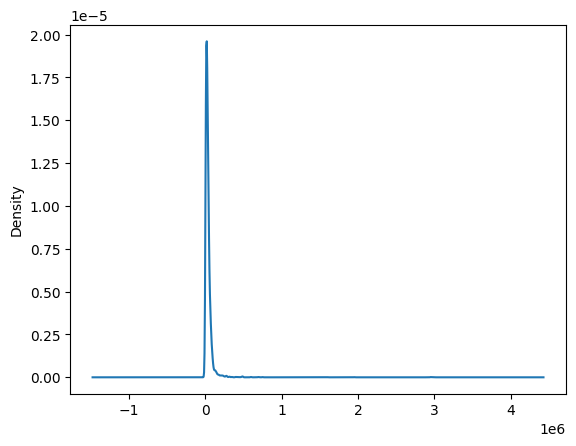

In [251]:
train_preprocessed.price.plot(kind='density')

<Axes: >

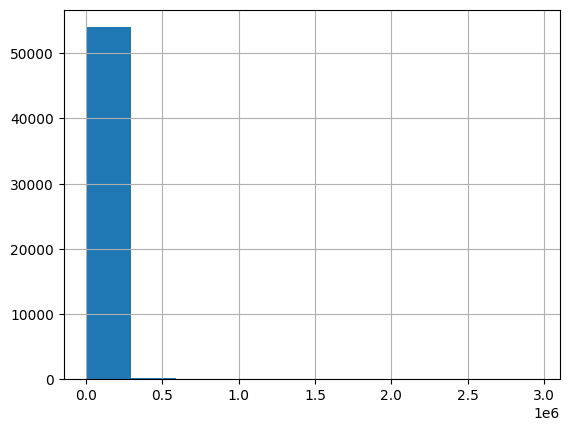

In [253]:
train_preprocessed.price.hist()

<Axes: >

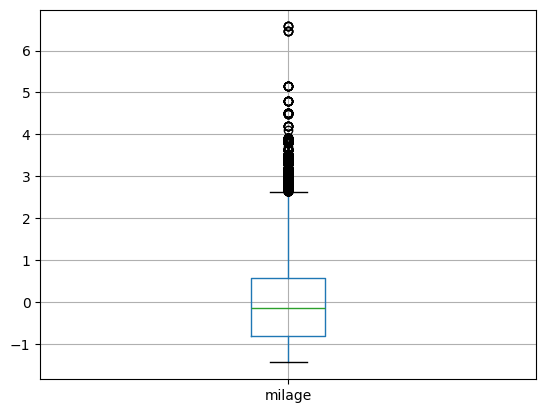

In [258]:
train_preprocessed.boxplot('milage')

##### Correct the outliers

In [261]:
id = train_preprocessed[['id']]

In [260]:
train = train_preprocessed.drop('id', axis=1)
train.head()

,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,...,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col,price
0,0.522314,0.033808,0.413748,-0.166146,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14,649,2,28,63,11000
1,-1.445825,0.145560,-0.304322,-0.542341,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4,49,19,19,12,8250
2,-1.087982,0.372801,-0.304322,0.360526,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,21,1803,15,194,9,15000
3,1.238001,-1.388293,0.030777,-0.542341,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,4,1779,45,107,28,63500
4,-2.519356,0.758603,-1.261749,0.059570,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,40,699,35,263,12,7850


In [262]:
file = train
train = ola.outliers_correction_iqr(file, iqr_multiplier=1.5)

In [263]:
train_df = pd.concat([id, train], axis=1)
train_df = train_df.reset_index(drop=True)
train_df.head()

,id,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col,price
0,0,0.522314,0.033808,0.413748,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,14.0,649.0,2.0,28.0,12.0,11000.0
1,1,-1.445825,0.145560,-0.304322,-0.542341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,49.0,19.0,19.0,12.0,8250.0
2,2,-1.087982,0.372801,-0.304322,0.360526,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,21.0,1803.0,15.0,194.0,9.0,15000.0
3,3,1.238001,-1.388293,0.030777,-0.542341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1779.0,45.0,107.0,28.0,63500.0
4,4,0.002006,0.758603,-1.261749,0.059570,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,40.0,699.0,35.0,263.0,12.0,7850.0


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso, Ridge

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

In [259]:
def train_and_score_model(file, model_name, target_column, seed):
    
    '''
    This function split the pandas dataframe into features and target and convert them into array.
    It uses the train_test_split library from sklearn to split the features and target into training and test set for training a mode.
    It iteratively uses the defined seedSearch on the train_test_split to fit, predict and score a training model on a range of seeds
    and select the seed that gives best score which measures its performance.
    
    Inputs:
        file: This is the pandas dataframe to train a model on.
        model_name: This is the model to be use for training the dataset depending on the use case and the dataset.
        target_column: This is the target column i.e the column to be predicted from the pandas dataframe.
        seed: The random integer to be specify to allow for reproducibility.
           
    Output:
        This function returns y_pred, y_test and the metrics - mse, rmse, mae, r2.
    '''
    feat_df = file.drop(target_column, axis=1)
    target_df = file[target_column]
    X = feat_df.values
    y = target_df.values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    model_name.fit(X_train, y_train)
    y_pred = model_name.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"The mean_squared_error is {mse}")
    print(f"The root_mean_squared_error is {rmse}")
    print(f"The r2 score is {r2}")
    return y_pred,y_test,mse,rmse,mae,r2

In [270]:
file = train_df
model_name = Lasso(alpha=0.5)
target_column = 'price'
seed = 20
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 169267932.62857488
The root_mean_squared_error is 13010.3010199063
The r2 score is 0.5118588038222252


### The baseline model

In [286]:
file = train_df
model_name = RandomForestRegressor()
target_column = 'price'
seed = 20
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 153850630.27912986
The root_mean_squared_error is 12403.653908390457
The r2 score is 0.5563197970760769


In [287]:
rf_baseline = model_name
rf_baseline

RandomForestRegressor()

#### <font color = 'red'> This section implements 9 models on the RFE selected dataset:
    1.XGBoost
    2.Decision Tree
    3.Gradient Boosting
    4.AdaBoost
    5.ExtraTrees
    6.Ridge
    7.HistGradientBoosting
    8.StackingRegressor
    9.VotingRegressor

###### Define the validation technique

In [276]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=seed, shuffle=True)

###### `1. XGBoostRegressor`

###### instantiate the instance of the model

In [273]:
xgbr = XGBRegressor()

###### Hyperparameter tunning for the model - `XGBRegressor`

In [274]:
param_grid_xgbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.001, 0.1],
    'max_depth': [6, 8],
    'subsample': [0.8, 1.0],
    'n_jobs': [-1]
}

###### Instantiate the model with GridSearchCV

In [277]:
%%time
xgbr_gridCV = GridSearchCV(
    xgbr,
    param_grid_xgbr,
    cv=cv,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

CPU times: total: 0 ns
Wall time: 5.56 ms


##### Train the model

In [278]:
%%time
file = train_df
model_name = xgbr_gridCV
target_column = 'price'
seed = seed
y_pred,y_test,mse,rmse,mae,r2 = train_and_score_model(file, model_name, target_column, seed)

The mean_squared_error is 147273255.77213708
The root_mean_squared_error is 12135.619299077285
The r2 score is 0.5752878757292137
CPU times: total: 2.98 s
Wall time: 35.1 s


###### Accessing the `best_xgbr_gridCV_model`

In [279]:
xgbr_best_model = xgbr_gridCV.best_estimator_

###### Accessing the best parameters and scores

In [280]:
xgbr_gridCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'n_jobs': -1,
 'subsample': 1.0}

In [281]:
xgbr_gridCV.best_score_

-154973731.91006827

In [282]:
xgbr_best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

##### Use the trained model on the test_preprocessed to predict the `price`

In [283]:
test_preprocessed.head()

,id,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,num_cylinder_5,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col
0,54273,-0.193373,0.007131,-0.285174,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,35,542,35,263,9
1,54274,-0.014451,1.095420,-0.543679,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,26,1294,28,226,12
2,54275,-0.014451,-0.408492,-0.869204,-1.294730,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35,328,22,28,129
3,54276,0.522314,-0.853107,1.782867,0.962437,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,25,1373,45,263,129
4,54277,0.880158,0.343316,0.030777,-0.542341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4,1775,28,263,12


##### Correct the outliers

In [284]:
id = test_preprocessed[['id']]

test = test_preprocessed.drop('id', axis=1)

file = test
test = ola.outliers_correction_iqr(file, iqr_multiplier=1.5)

test_df = pd.concat([id, test], axis=1)
test_df = test_df.reset_index(drop=True)
test_df.head()

,id,model_year,milage,power,litre,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,...,num_cylinder_5,num_cylinder_8,num_cylinder_Flat 6,num_cylinder_Straight 6,num_cylinder_V6,brand,model,transmission,ext_col,int_col
0,54273,-0.193373,0.007131,-0.285174,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,35.0,542.0,35.0,263.0,9.0
1,54274,-0.014451,1.095420,-0.543679,-0.166146,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,26.0,1294.0,28.0,226.0,12.0
2,54275,-0.014451,-0.408492,-0.869204,-1.294730,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.0,328.0,22.0,28.0,12.0
3,54276,0.522314,-0.853107,1.782867,0.962437,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,25.0,1373.0,45.0,263.0,12.0
4,54277,0.880158,0.343316,0.030777,-0.542341,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1775.0,28.0,263.0,12.0


##### <font color = 'red'> Ready to use our Models to make Predictions

###### <font color = 'green'> **The test_df dataset is used with the baseline model `RandomForestRegressor`to predict the label class - `price`.**

In [288]:
rf_baseline

RandomForestRegressor()

In [289]:
test_baseline_pred = rf_baseline.predict(test_df)
test_baseline_pred

C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([23182.41, 15903.69, 24654.49, ..., 10372.98, 46752.45, 10948.18])

###### Prepare the submission file for baseline predictions

In [290]:
os.getcwd()

'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\KaggleX Cohort4 Challenge\\outputs'

In [291]:
submission_file_base = pd.DataFrame({'id': test_df['id'], 'price': test_baseline_pred})

In [292]:
main_dir = main
file_name = submission_file_base
dest_path = 'outputs'
save_name = 'submission_file_baseline'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is submission_file_baseline and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\KaggleX Cohort4 Challenge/outputs folder


In [293]:
xgbr_best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [294]:
test_xgbr_pred = xgbr_best_model.predict(test_df)
test_xgbr_pred

array([19154.268 , 17072.916 , 26835.865 , ...,  8178.1714, 50053.438 ,
       12963.067 ], dtype=float32)

###### Prepare the submission file for baseline predictions

In [295]:
submission_file_xgbr = pd.DataFrame({'id': test_df['id'], 'price': test_xgbr_pred})

In [296]:
main_dir = main
file_name = submission_file_xgbr
dest_path = 'outputs'
save_name = 'submission_file_xgbr_olalytics'
ext = '.csv'
ola.file_image_saver_versioning_v1(main_dir, file_name, dest_path, save_name, ext)

The file is submission_file_xgbr_olalytics and is saved in the C:\Users\Olanrewaju Adegoke\Desktop\TechTern\mywork\KaggleX Cohort4 Challenge/outputs folder
